# Spam detection


Author:


In [1]:
#reading the data
import pandas as pd
data = pd.read_excel('data.xlsx')
data.columns = ['label', 'messages']
data.describe()

,label,messages
count,5574,5574
unique,2,5171
top,ham,"Sorry, I'll call later"
freq,4827,30


In [2]:
data.head(10)

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


## Exploratory data analysis

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

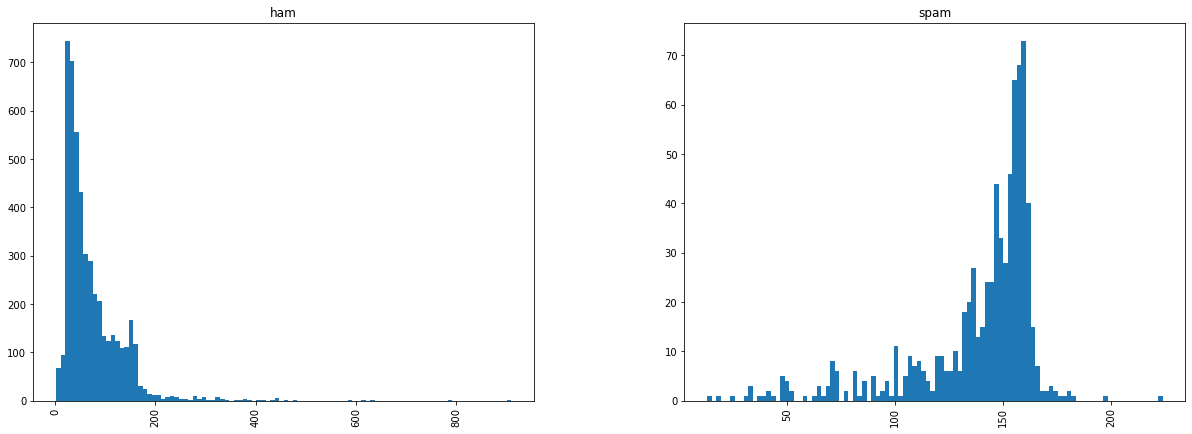

In [3]:
data["length"] = data["messages"].apply(len)
data.sort_values(by='length', ascending=False)
data.hist(column='length', by='label', bins=100, figsize=(20,7))

##### The above histogram tells us that spam messages generally has more length. 

In [4]:
import string
from nltk.corpus import stopwords

#for message in data["messages"]:
def clean_message(message):
    sentence = []
    for c in message:
        if c not in string.punctuation:
            sentence.append(c)
    sentence = ''.join(sentence)
    # all the punctuation marks from the messages are removed here
    #now we want to remove the stopwords which will increase the redundancy in the dataframe and
    #will not affect the classifier.
    sentence=sentence.lower()
    word_list = list(sentence.split(" "))
    for word in word_list:
        if word in stopwords.words('english'):
            word_list.remove(word)
    sentence=" ".join(word_list)
    return sentence
    #data.loc[data['messages'] == message, 'messages'] = sentence

#data.head(10)

In [5]:
data['messages'].head(5).apply(clean_message)

0    go jurong point crazy available in bugis n gre...
1                              ok lar joking wif u oni
2    free entry 2 wkly comp win fa cup final tkts 2...
3                  u dun say early hor u c already say
4          nah dont think goes usf lives around though
Name: messages, dtype: object

In [8]:
def text_to_vector(text):
    word_vector = np.zeros(vocab_size)
    for word in text.split(" "):
        if word2idx.get(word) is None:
            continue
        else:
            word_vector[word2idx.get(word)] += 1
    return np.array(word_vector)
      # Convert all titles to vectors
    word_vectors = np.zeros((len(text), len(vocab)), dtype=np.int_)
    for i, (_, text_) in enumerate(text.iterrows()):
        word_vectors[i] = text_to_vector(text_[0])


In [10]:
#Converting words to vector using TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data['messages'])
vectors.shape
 
#features = word_vectors
features = vectors



In [13]:
# Classification Model
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, data['label'], test_size=0.15, random_state=111)

#Training multiple machine learning algorithms
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc = SVC(kernel='sigmoid', gamma=1.0)

clfs = {'SVC' : svc}
def train(clf, features, targets):    
    clf.fit(features, targets)
def predict(clf, features):
    return (clf.predict(features))
pred_scores_word_vectors = []
for k,v in clfs.items():
    train(v, X_train, y_train)
    pred = predict(v, X_test)
    pred_scores_word_vectors.append((k, [accuracy_score(y_test , pred)]))

In [14]:
pred_scores_word_vectors

[('SVC', [0.984468339307049])]

#### The above code shows the accuracy of the SVM model.
#### The accuracy is a good way to know is the model is efficient but this is not enough to say that our model is good, for this reason we have used Classification Report and Confusion Matrix.

In [19]:
from sklearn.metrics import classification_report
print("Classification report")
print (classification_report(y_test, pred))

Classification report
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       732
        spam       1.00      0.88      0.93       105

    accuracy                           0.98       837
   macro avg       0.99      0.94      0.96       837
weighted avg       0.98      0.98      0.98       837



In [21]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[732   0]
 [ 13  92]]


#### You can see from above confusion matrix and classification report that results obtained are quite good.

### checking for a custom message input

In [17]:

def find(x):
    if x == 1:
        print ("Message is SPAM")
    else:
        print ("Message is NOT Spam")
text = ["Free tones Hope you enjoyed your new content"]
integers = vectorizer.transform(text)
x = mnb.predict(integers)[0]
find(x) 

Message is NOT Spam
